<a href="https://colab.research.google.com/github/Sam-intech/Machine-Learning/blob/main/ML_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and library importation

In [1]:
from google.colab import files
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving Company_House_Info.csv to Company_House_Info.csv


In [3]:
company = pd.read_csv('Company_House_Info.csv')
company.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


# Exploratory Data Analysis (Understanding the dataset)

In [4]:
company.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [5]:
company.shape
# company.columns
# company.dtypes
# company.describe()

(6665, 96)

In [6]:
company.dtypes

,0
Bankrupt?,int64
ROA(C) before interest and depreciation before interest,float64
ROA(A) before interest and % after tax,float64
ROA(B) before interest and depreciation after tax,float64
Operating Gross Margin,float64
...,...
Liability to Equity,float64
Degree of Financial Leverage (DFL),float64
Interest Coverage Ratio (Interest expense to EBIT),float64
Net Income Flag,int64


### Corrolation matrix

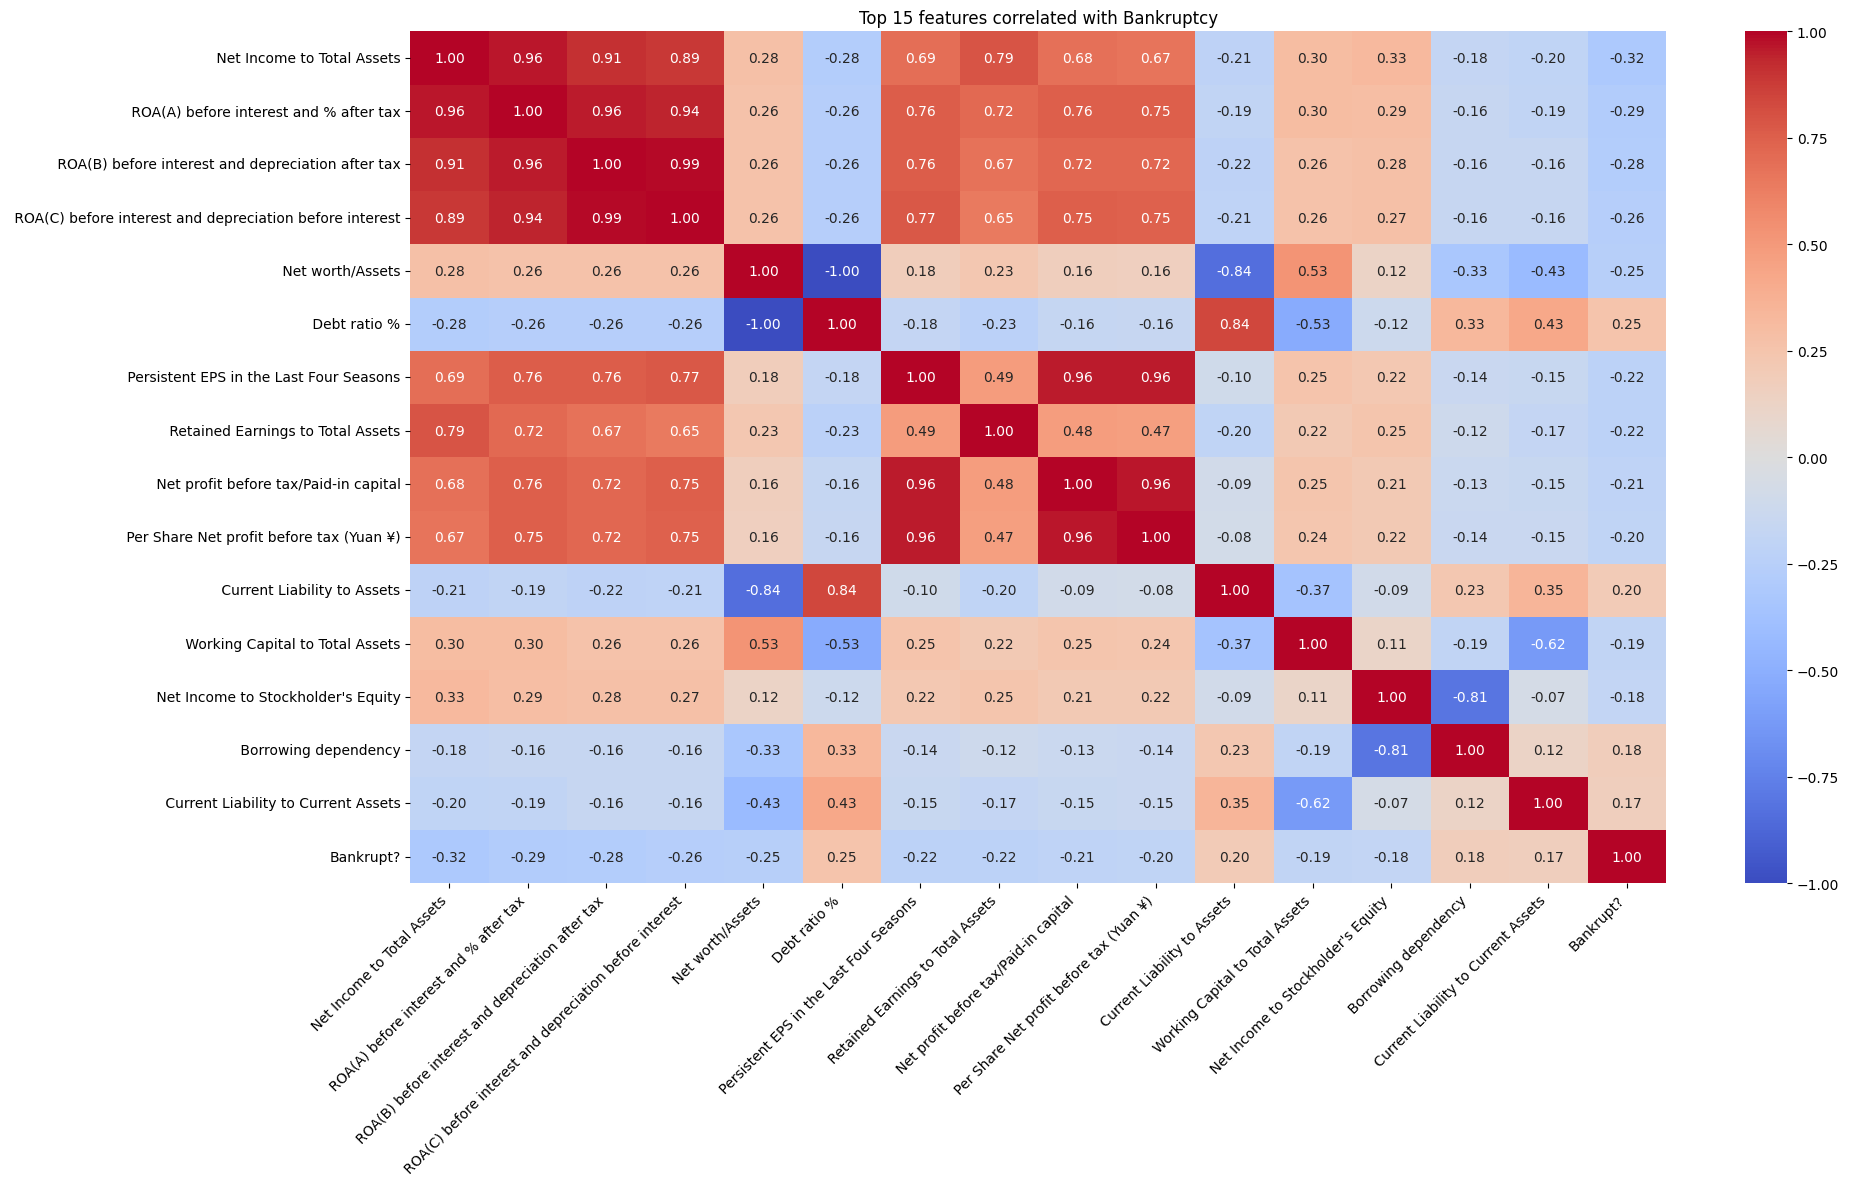

In [7]:
corr_matrix = company.corr()
# corr_matrix

DDtarget_corr = corr_matrix['Bankrupt?'].drop('Bankrupt?').sort_values(key=abs, ascending=False).head(15)

plt.figure(figsize=(20,12))
sns.heatmap(company[DDtarget_corr.index.to_list() + ['Bankrupt?']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top 15 features correlated with Bankruptcy')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# plt.xlabel('Correlation')
# plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Data visualization

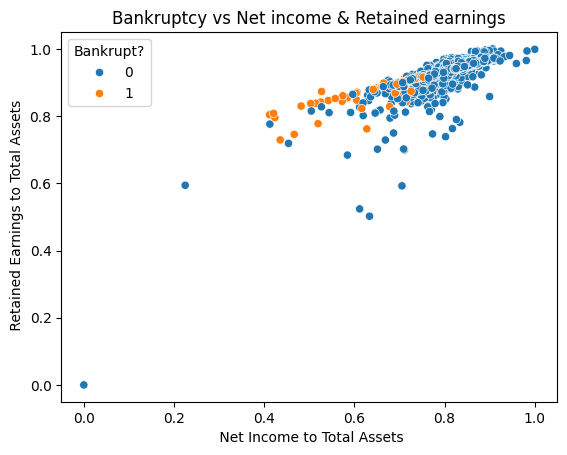

In [8]:
# sns.pairplot(company[company_15features].sample(100))  # Sample to reduce overload
# sns.scatterplot(data=company, x=' Net Income to Total Assets', y=' Working Capital to Total Assets', hue='Bankrupt?')
sns.scatterplot(data=company, x=' Net Income to Total Assets', y=' Retained Earnings to Total Assets', hue='Bankrupt?')

plt.title('Bankruptcy vs Net income & Retained earnings')
plt.show()

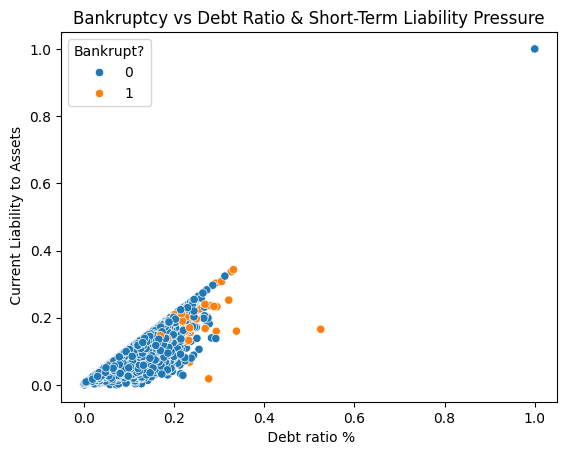

In [9]:
sns.scatterplot(data=company, x=' Debt ratio %', y=' Current Liability to Assets', hue='Bankrupt?')

plt.title("Bankruptcy vs Debt Ratio & Short-Term Liability Pressure")
# plt.xlabel("Debt Ratio %")
# plt.ylabel("Current Liability to Assets")
# plt.legend(title='Bankrupt?')
plt.show()

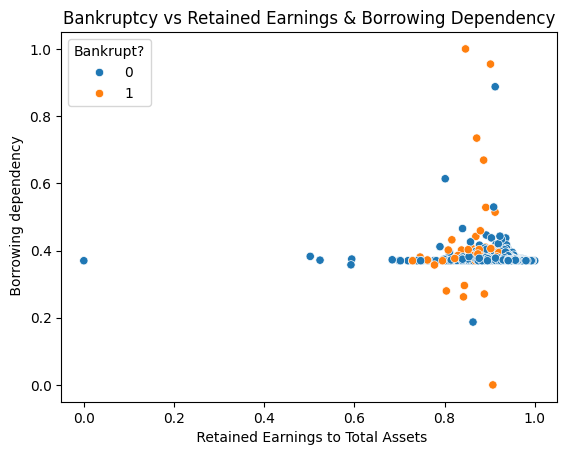

In [10]:
sns.scatterplot(data=company, x=' Retained Earnings to Total Assets', y=' Borrowing dependency', hue='Bankrupt?')

plt.title("Bankruptcy vs Retained Earnings & Borrowing Dependency")
# plt.xlabel("Retained Earnings to Total Assets")
# plt.ylabel("Borrowing Dependency")
# plt.legend(title='Bankrupt?')
plt.show()

# Data Preprocessing

### Data cleaning

In [11]:
company.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [12]:
company.duplicated().sum()

np.int64(0)

### Dectecting Outliers

In [13]:
from scipy.stats import zscore

In [14]:
z_scores = ny.abs(zscore(company))

outliers = (z_scores > 3).any(axis=1)

outliers.sum()

<ipython-input-14-9d01ac49d06c>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = ny.abs(zscore(company))


np.int64(1983)

### Feature scaling (RobustScaler)

In [15]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [16]:
# seperate features and target
feature = company.drop(columns=['Bankrupt?'])
target = company['Bankrupt?']

# Standardize feature columns
# scaler = StandardScaler()
scaler = RobustScaler()
feature_scaled = scaler.fit_transform(feature)

### Handling class Imbalance

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
Counter(target)

Counter({1: 219, 0: 6446})

In [19]:
smote = SMOTE(random_state=42)
feature_resampled, target_resampled = smote.fit_resample(feature_scaled, target)

In [20]:
Counter(target_resampled)

Counter({1: 6446, 0: 6446})

In [21]:
df_scaledfeature = pd.DataFrame(feature_scaled, columns=feature.columns)

# combine with resampled target feature
# cleandata = df_scaledfeature.copy()
# cleandata['Bankrupt?'] = target_resampled

In [22]:
print("Original class distribution:", Counter(target))
print("Resampled class distribution:", Counter(target_resampled))
print("Shape of resampled features:", feature_resampled.shape)
print("Shape of resampled target:", target_resampled.shape)

Original class distribution: Counter({0: 6446, 1: 219})
Resampled class distribution: Counter({1: 6446, 0: 6446})
Shape of resampled features: (12892, 95)
Shape of resampled target: (12892,)


### Feature Selection

In [23]:
# df_scaledfeature = pd.DataFrame(feature_scaled, columns=feature.columns)

# combine with resampled target feature
cleandata = df_scaledfeature.copy()
cleandata['Bankrupt?'] = target_resampled


In [24]:
cleandata.head(10)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,-2.240066,-2.532653,-2.577757,-0.334053,-0.333333,-0.423294,-2.993536,-3.598181,-7.435566,-3.872800,...,1.598879,-1.865964,-0.334231,-5.916269,2.512568,-1.674700,-2.088430,0.0,-0.608307,1
1,-0.649007,-0.402041,-0.623940,0.323260,0.325758,-0.609061,-0.427652,-0.471415,0.263802,-0.765693,...,1.397231,-0.423677,0.323426,-0.533952,1.113674,1917.116735,8.554460,0.0,-0.455876,1
2,-1.298013,-1.135714,-1.406221,-0.334593,-0.340368,-1.317936,-5.511189,-6.282530,-12.607339,-8.051872,...,8.525710,-0.070384,-0.334527,-1.957597,2.509627,-2.044878,-2.686248,0.0,-0.608117,1
3,-1.743378,-2.029592,-1.662582,-1.675661,-1.678571,-2.578562,-2.578130,-2.603978,-1.486704,-2.345606,...,0.256202,-1.773113,-1.675694,-2.883179,0.646022,-0.900632,-1.022708,0.0,-0.343531,1
4,-0.636589,-0.397959,-0.525919,-0.534269,-0.534091,-0.391867,-0.501082,-0.452363,-0.425354,-0.502927,...,0.396859,-0.668252,-0.534285,-0.532403,-0.059905,-16.581355,18.010292,0.0,0.062001,1
5,-1.932947,-2.705102,-2.342130,-1.179169,-1.174784,-2.111836,-2.910025,-3.845076,-3.464206,-3.370707,...,0.711955,-2.377935,-1.178910,-5.003368,1.386836,-1.072115,-1.240056,0.0,-0.500271,1
6,-1.894868,-2.133674,-2.042413,1.050729,1.055195,-0.231983,-2.344146,-2.637119,-6.014299,-2.708782,...,3.658343,-0.416772,1.050652,-4.985185,3.019273,-1.500000,-1.827766,0.0,-0.636698,0
7,0.099338,0.210204,0.121583,-0.313006,-0.313853,-0.105365,-0.070558,-0.084506,0.163600,-0.076991,...,1.775533,-0.067403,-0.312813,0.130055,-0.039323,1.791452,1.454367,0.0,0.040800,0
8,-0.237583,-0.272449,-0.156456,-0.172693,-0.171537,-0.490762,-0.254145,-0.233640,0.492846,-0.215902,...,-0.290233,0.183774,-0.172486,-0.303419,-0.520181,0.663549,0.590678,0.0,1.131039,0
9,-0.115894,-0.164286,-0.162111,-0.502428,-0.502165,-0.171906,-0.305979,-0.346317,-0.357870,-0.358997,...,0.828912,-0.025580,-0.502570,-0.213613,0.132396,3.504814,2.459917,0.0,-0.103249,0


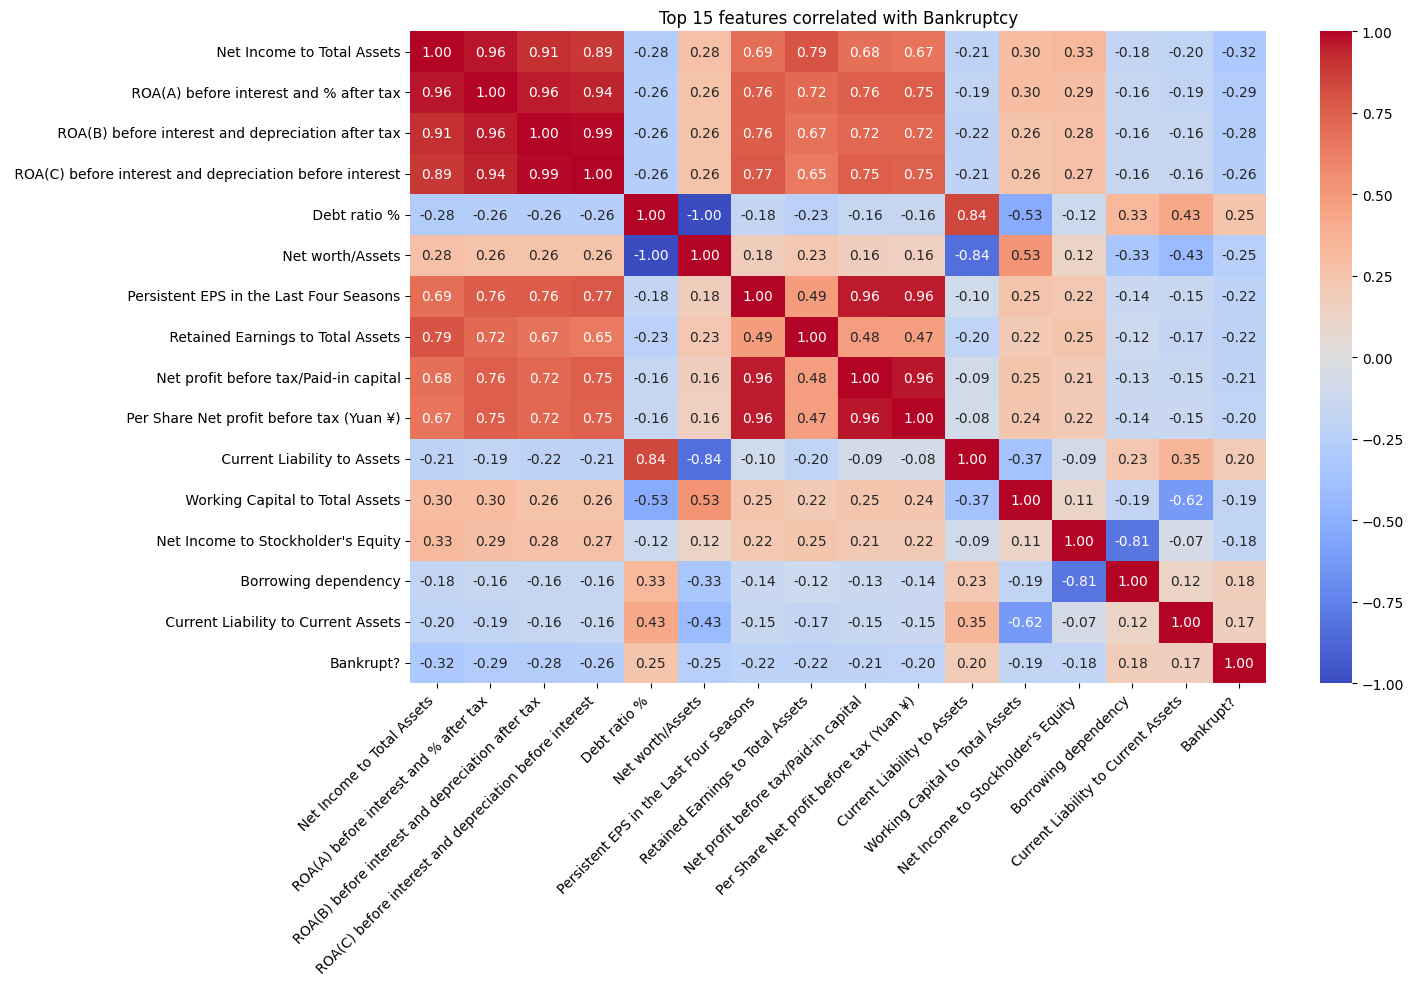

In [25]:
corr_matrix = cleandata.corr()
top_features = corr_matrix['Bankrupt?'].drop('Bankrupt?').abs().sort_values(ascending=False).head(15).index.tolist()

# newdataset = top_features + ['Bankrupt?']
# new_company = cleandata[newdataset]

plt.figure(figsize=(15,10))
sns.heatmap(cleandata[top_features + ['Bankrupt?']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Top 15 features correlated with Bankruptcy')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# plt.xlabel('Correlation')
# plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [26]:
cleandata.head(10)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,-2.240066,-2.532653,-2.577757,-0.334053,-0.333333,-0.423294,-2.993536,-3.598181,-7.435566,-3.872800,...,1.598879,-1.865964,-0.334231,-5.916269,2.512568,-1.674700,-2.088430,0.0,-0.608307,1
1,-0.649007,-0.402041,-0.623940,0.323260,0.325758,-0.609061,-0.427652,-0.471415,0.263802,-0.765693,...,1.397231,-0.423677,0.323426,-0.533952,1.113674,1917.116735,8.554460,0.0,-0.455876,1
2,-1.298013,-1.135714,-1.406221,-0.334593,-0.340368,-1.317936,-5.511189,-6.282530,-12.607339,-8.051872,...,8.525710,-0.070384,-0.334527,-1.957597,2.509627,-2.044878,-2.686248,0.0,-0.608117,1
3,-1.743378,-2.029592,-1.662582,-1.675661,-1.678571,-2.578562,-2.578130,-2.603978,-1.486704,-2.345606,...,0.256202,-1.773113,-1.675694,-2.883179,0.646022,-0.900632,-1.022708,0.0,-0.343531,1
4,-0.636589,-0.397959,-0.525919,-0.534269,-0.534091,-0.391867,-0.501082,-0.452363,-0.425354,-0.502927,...,0.396859,-0.668252,-0.534285,-0.532403,-0.059905,-16.581355,18.010292,0.0,0.062001,1
5,-1.932947,-2.705102,-2.342130,-1.179169,-1.174784,-2.111836,-2.910025,-3.845076,-3.464206,-3.370707,...,0.711955,-2.377935,-1.178910,-5.003368,1.386836,-1.072115,-1.240056,0.0,-0.500271,1
6,-1.894868,-2.133674,-2.042413,1.050729,1.055195,-0.231983,-2.344146,-2.637119,-6.014299,-2.708782,...,3.658343,-0.416772,1.050652,-4.985185,3.019273,-1.500000,-1.827766,0.0,-0.636698,0
7,0.099338,0.210204,0.121583,-0.313006,-0.313853,-0.105365,-0.070558,-0.084506,0.163600,-0.076991,...,1.775533,-0.067403,-0.312813,0.130055,-0.039323,1.791452,1.454367,0.0,0.040800,0
8,-0.237583,-0.272449,-0.156456,-0.172693,-0.171537,-0.490762,-0.254145,-0.233640,0.492846,-0.215902,...,-0.290233,0.183774,-0.172486,-0.303419,-0.520181,0.663549,0.590678,0.0,1.131039,0
9,-0.115894,-0.164286,-0.162111,-0.502428,-0.502165,-0.171906,-0.305979,-0.346317,-0.357870,-0.358997,...,0.828912,-0.025580,-0.502570,-0.213613,0.132396,3.504814,2.459917,0.0,-0.103249,0


### Data Splitting

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# split features and target variables
newcompany_features = cleandata.drop(columns=['Bankrupt?'])
newcompany_target = cleandata['Bankrupt?']

# split data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(newcompany_features, newcompany_target, test_size=0.2, random_state=42, stratify=newcompany_target)

# Model Training

### Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# RF_model = RandomForestClassifier(random_state=42)
# RF_model.fit(features_train, target_train)
# # model.fit(features_train, target_train)

# RF_Result = RF_model.predict(features_test)

### Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# DT_model = DecisionTreeClassifier(random_state=42)
# DT_model.fit(features_train, target_train)

# DT_Result = DT_model.predict(features_test)

### Logistics Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression

# LR_model = LogisticRegression(random_state=42)
# #LR_model.fit(features_train, target_train)

# LR_Result = LR_model.predict(features_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support vector machine

In [ ]:
# from sklearn.svm import SVC

# SVM_model = SVC(random_state=42)
# SVM_model.fit(features_train, target_train)

# SVM_Result = SVM_model.predict(features_test)

### XGBoost

In [ ]:
# from xgboost import XGBClassifier

# XGB_model = XGBClassifier(random_state=42)
# XGB_model.fit(features_train, target_train)

# XGB_Result = XGB_model.predict(features_test)

### KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# KNN_model = KNeighborsClassifier()
# KNN_model.fit(features_train, target_train)

# KNN_Result = KNN_model.predict(features_test)

### Multilayer Perception

In [ ]:
# from sklearn.neural_network import MLPClassifier

# MLP_model = MLPClassifier(random_state=42)
# MLP_model.fit(features_train, target_train)

# MLP_Result = MLP_model.predict(features_test)

### Taininig method II

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    model.fit(features_train, target_train)
    result = model.predict(features_test)
    # # print(classification_report(target_test, result))
    print("Accuracy:", accuracy_score(target_test, result))
    # print("Confusion Matrix:")
    # print(confusion_matrix(target_test, result))


Logistic Regression
Accuracy: 0.7651912978244562

Random Forest
Accuracy: 0.972993248312078

Decision Tree
Accuracy: 0.9504876219054764

SVM
Accuracy: 0.9669917479369843

KNN
Accuracy: 0.9654913728432108


In [30]:
# Singlar model
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(features_train, target_train)
RF_Result = RF_model.predict(features_test)

In [31]:
from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Apply GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RF_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(features_train, target_train)

# Get best model
newoutcome = grid_search.best_estimator_

# Model Evaluation

In [32]:
baseline_model = RF_model.predict(features_test)
Tuned_model = newoutcome.predict(features_test)

baseline_result = baseline_model
Tuned_result = Tuned_model

### F1 Score

In [33]:
from sklearn.metrics import accuracy_score, f1_score

# For baseline
baseline_train_pred = RF_model.predict(features_train)
baseline_test_pred = RF_model.predict(features_test)

baseline_train_f1 = f1_score(target_train, baseline_train_pred)
baseline_test_f1 = f1_score(target_test, baseline_test_pred)

# For tuned
tuned_train_pred = newoutcome.predict(features_train)
tuned_test_pred = newoutcome.predict(features_test)

tuned_train_f1 = f1_score(target_train, tuned_train_pred)
tuned_test_f1 = f1_score(target_test, tuned_test_pred)

print(f"Baseline F1 - Train: {baseline_train_f1:.2f}, Test: {baseline_test_f1:.2f}")
print(f"Tuned F1    - Train: {tuned_train_f1:.2f}, Test: {tuned_test_f1:.2f}")

Baseline F1 - Train: 1.00, Test: 0.40
Tuned F1    - Train: 0.74, Test: 0.46


<ipython-input-34-ae3091f81aac>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=f1_scores, palette='viridis')


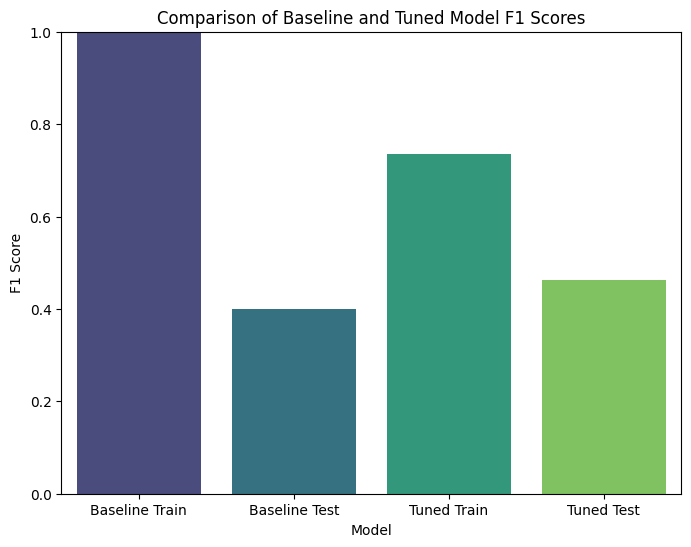

<ipython-input-34-ae3091f81aac>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='F1 Score', data=f1_scores_baseline, palette='coolwarm')
<ipython-input-34-ae3091f81aac>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='F1 Score', data=f1_scores_tuned, palette='coolwarm')


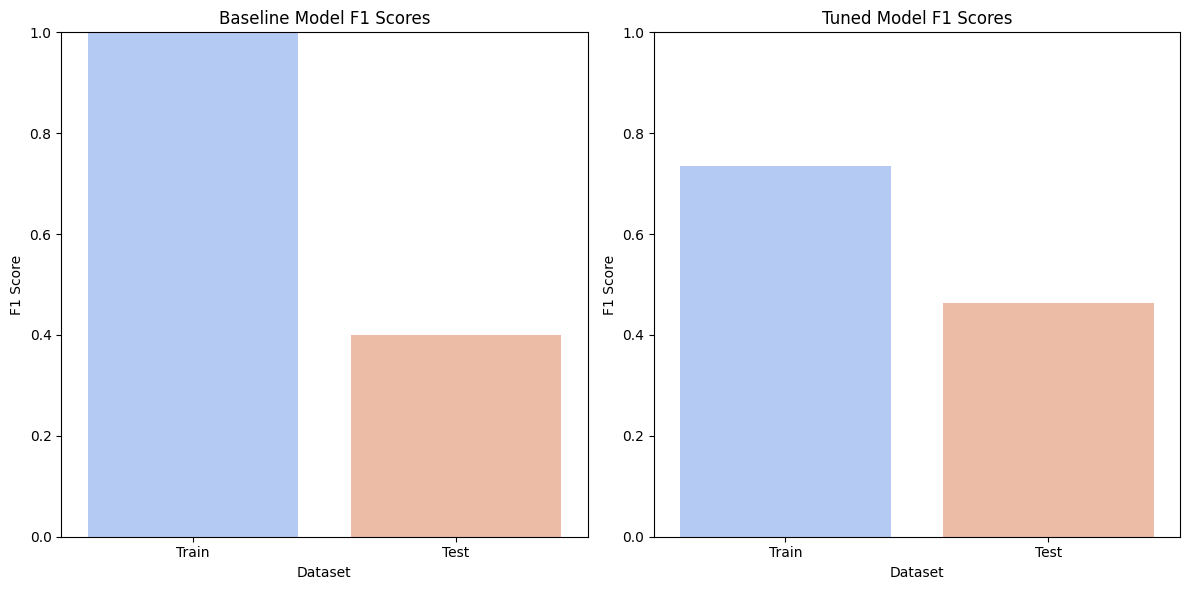

In [34]:
# prompt: visualise baseline f1 and test f1 seperately. Use the best visualisation for the result or for f1

import pandas as pd
import matplotlib.pyplot as plt
# Prepare data for plotting
f1_scores = pd.DataFrame({
    'Model': ['Baseline Train', 'Baseline Test', 'Tuned Train', 'Tuned Test'],
    'F1 Score': [baseline_train_f1, baseline_test_f1, tuned_train_f1, tuned_test_f1]
})

# Visualize F1 scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1 Score', data=f1_scores, palette='viridis')
plt.title('Comparison of Baseline and Tuned Model F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1) # F1 score is between 0 and 1
plt.show()

# Visualize Baseline and Tuned F1 scores separately
f1_scores_baseline = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'F1 Score': [baseline_train_f1, baseline_test_f1]
})

f1_scores_tuned = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'F1 Score': [tuned_train_f1, tuned_test_f1]
})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Dataset', y='F1 Score', data=f1_scores_baseline, palette='coolwarm')
plt.title('Baseline Model F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(x='Dataset', y='F1 Score', data=f1_scores_tuned, palette='coolwarm')
plt.title('Tuned Model F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### confusion matrix

In [35]:
conf = confusion_matrix(target_test, RF_Result)
conf2 = confusion_matrix(target_test, Tuned_result)

print('Baseline confusion matrix:\n', conf)
print('Tuned confusion matrix::\n', conf2)

Baseline confusion matrix:
 [[1281    8]
 [  31   13]]
Tuned confusion matrix::
 [[1250   39]
 [  19   25]]


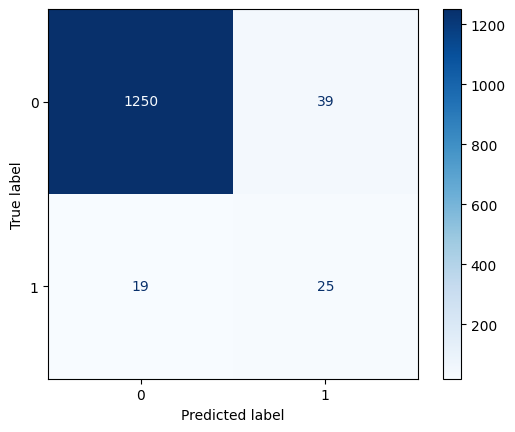

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for tuned model
tuned_cm = confusion_matrix(target_test, tuned_test_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=tuned_cm)
disp.plot(cmap="Blues")

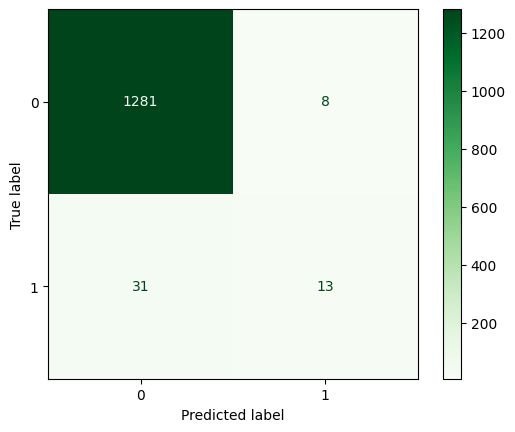

In [37]:
# Generate confusion matrix for tuned model
baseline_cm = confusion_matrix(target_test, baseline_result)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=baseline_cm)
disp.plot(cmap="Greens")

### ROC Curves

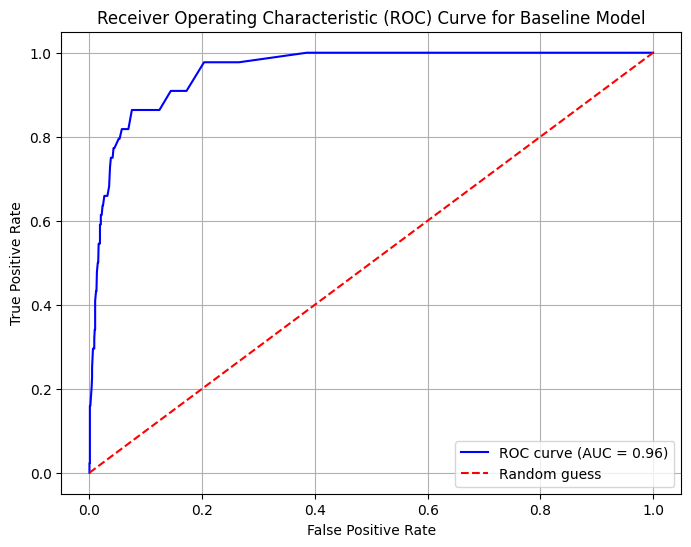

In [38]:
# prompt: generate a roc curve for the baseline model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
# For SVC, you need to set probability=True when initializing the model if you want probabilities.
# Since the provided code uses RandomForestClassifier, which supports predict_proba:
baseline_probs = RF_model.predict_proba(features_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(target_test, baseline_probs)

# Calculate AUC
auc = roc_auc_score(target_test, baseline_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Baseline Model')
plt.legend()
plt.grid(True)
plt.show()

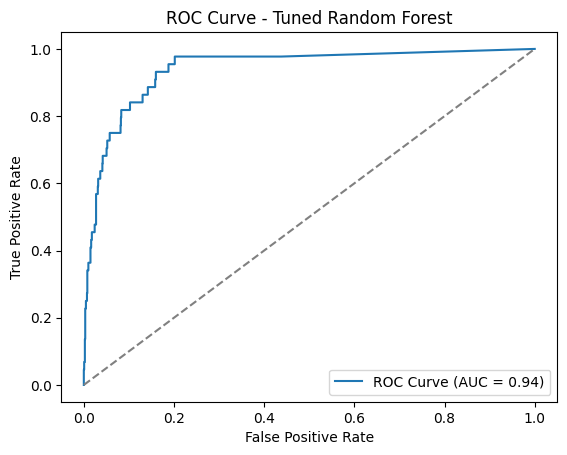

In [40]:
from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# Get probability scores
tuned_probs = newoutcome.predict_proba(features_test)[:, 1]  # Prob of class 1

# Calculate ROC
fpr, tpr, _ = roc_curve(target_test, tuned_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()

### Precisino recall curve

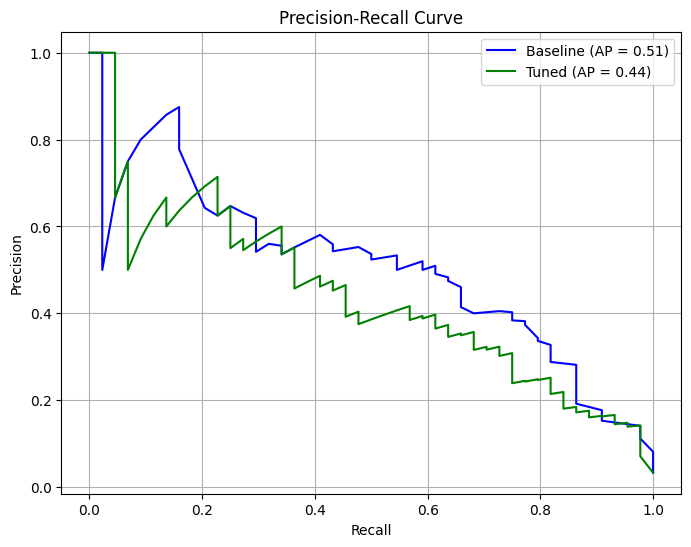

In [41]:
# prompt: generate code for a precision recall curve

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall for the baseline model
baseline_precision, baseline_recall, _ = precision_recall_curve(target_test, baseline_probs)
baseline_avg_precision = average_precision_score(target_test, baseline_probs)

# Calculate precision and recall for the tuned model
tuned_probs = newoutcome.predict_proba(features_test)[:, 1]
tuned_precision, tuned_recall, _ = precision_recall_curve(target_test, tuned_probs)
tuned_avg_precision = average_precision_score(target_test, tuned_probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))

plt.plot(baseline_recall, baseline_precision, color='blue', label=f'Baseline (AP = {baseline_avg_precision:.2f})')
plt.plot(tuned_recall, tuned_precision, color='green', label=f'Tuned (AP = {tuned_avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


### Learning curve

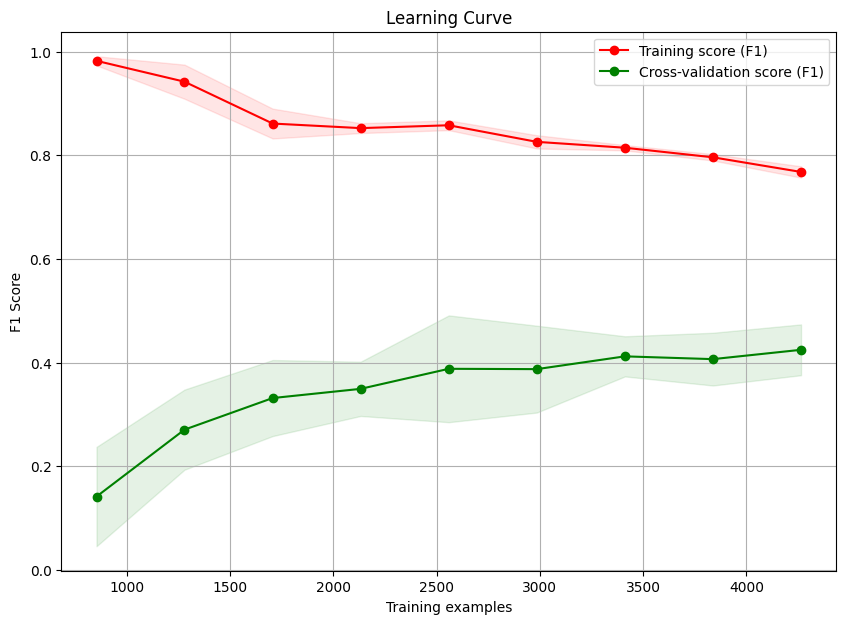

In [42]:
# prompt: generate a learning curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the model (using the best tuned model found by GridSearchCV)
model_for_learning_curve = newoutcome # Or RF_model if you want the baseline LC

# Define the training sizes
train_sizes, train_scores, test_scores = learning_curve(
    model_for_learning_curve, features_train, target_train,
    cv=5, # Use cross-validation
    scoring='f1', # Use F1 score as the metric
    n_jobs=-1, # Use all available cores
    train_sizes=ny.linspace(0.1, 1.0, 10) # Use 10 different sizes from 10% to 100% of the training set
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = ny.mean(train_scores, axis=1)
train_scores_std = ny.std(train_scores, axis=1)
test_scores_mean = ny.mean(test_scores, axis=1)
test_scores_std = ny.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 7))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score (F1)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score (F1)")

plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### Feature importance plot

<ipython-input-43-ab666c24611e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance, y=sorted_importance.index, palette='viridis')


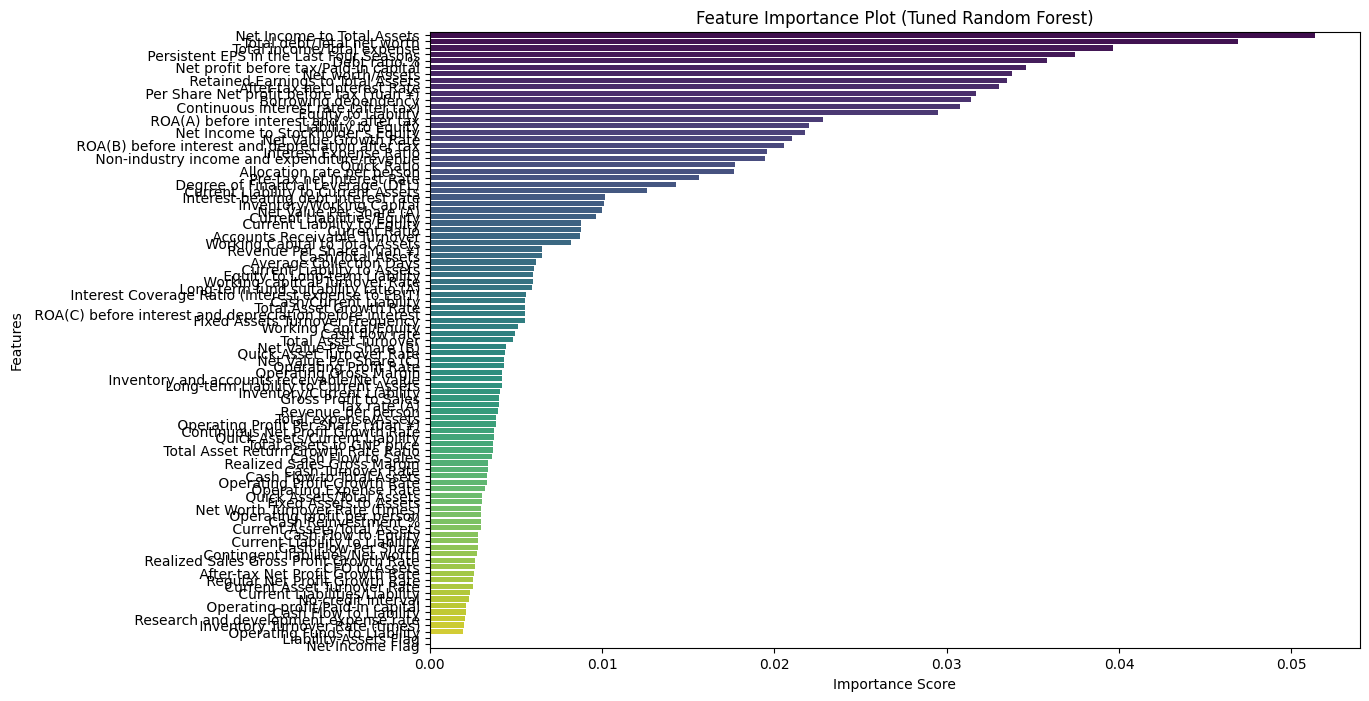

In [43]:
# prompt: generate a feature importance plot

import pandas as pd
import matplotlib.pyplot as plt
# Ensure the tuned model (newoutcome) is a RandomForestClassifier or has feature_importances_ attribute
if hasattr(newoutcome, 'feature_importances_'):
    # Get feature importances from the trained Random Forest model
    importances = newoutcome.feature_importances_

    # Get the names of the features used in the model
    feature_names = newcompany_features.columns

    # Create a pandas Series for easy sorting and visualization
    feature_importance_series = pd.Series(importances, index=feature_names)

    # Sort the features by importance
    sorted_importance = feature_importance_series.sort_values(ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_importance, y=sorted_importance.index, palette='viridis')
    plt.title('Feature Importance Plot (Tuned Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print("The selected model does not have feature_importances_ attribute.")
    print("Feature importance plot is typically generated for tree-based models like RandomForest or Gradient Boosting.")

### others

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
Eval = newoutcome.predict(features_test)

# confusion_matrix(target_test, Eval)
accuracy_score(target_test, Eval)

0.9564891222805701

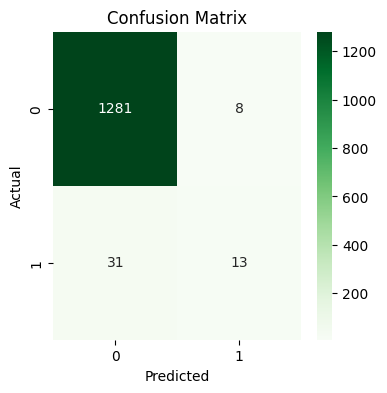

In [46]:
display = confusion_matrix(target_test, RF_Result)

plt.figure(figsize=(4, 4))
sns.heatmap(display, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
print('Random Forest -',(accuracy_score(target_test, RF_Result)))
# print('Logistics Regression -', (accuracy_score(target_test, LR_Result)))
# print('Support Vector Machine -', (accuracy_score(target_test, SVM_Result)))
# print('XGBoost -', (accuracy_score(target_test, XGB_Result)))
# print('KNN -', (accuracy_score(target_test, KNN_Result)))
# print('MLP -', (accuracy_score(target_test, MLP_Result)))

Random Forest - 0.9707426856714179


In [ ]:
# prompt: generate performance metrics - classification report

# print(classification_report(target_test, Result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1289
           1       0.67      0.27      0.39        44

    accuracy                           0.97      1333
   macro avg       0.82      0.63      0.69      1333
weighted avg       0.97      0.97      0.97      1333



<ipython-input-46-3cdbf655e8e2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


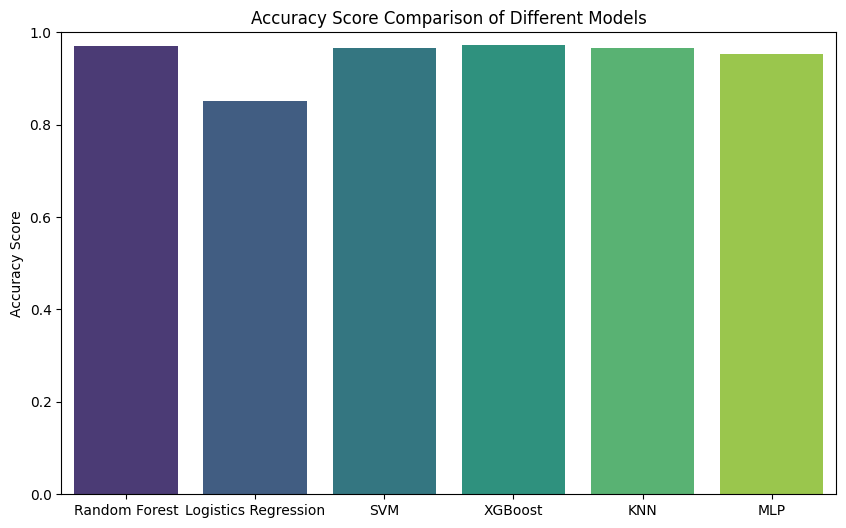

In [ ]:
# prompt: generate a visualisation for the accuracy score

import matplotlib.pyplot as plt
models = ['Random Forest', 'Logistics Regression', 'SVM', 'Decision tree', 'KNN']
accuracy_scores = [accuracy_score(target_test, RF_Result), accuracy_score(target_test, LR_Result), accuracy_score(target_test, SVM_Result), accuracy_score(target_test, DT_Result), accuracy_score(target_test, KNN_Result)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Score Comparison of Different Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()